## Camada 1: 32 filtros
## Camada 2: 64 filtros
## Camada 3: 128 filtros
## Camada 4: 128 filtros
## Camada 5: 256 filtros
## Camada 6: 256 filtros

## Kernel de (3, 3)

c:\Users\welli\anaconda3\envs\finaiti\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


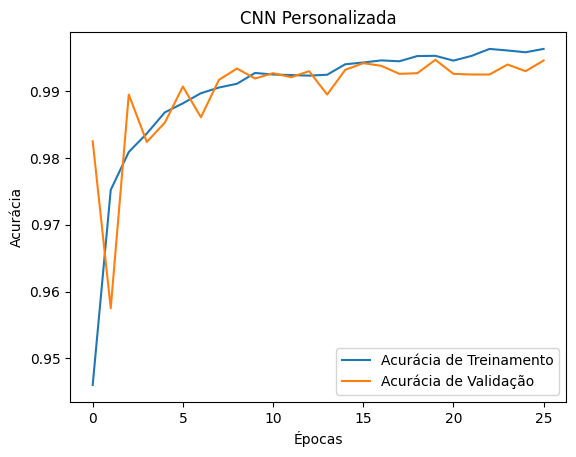

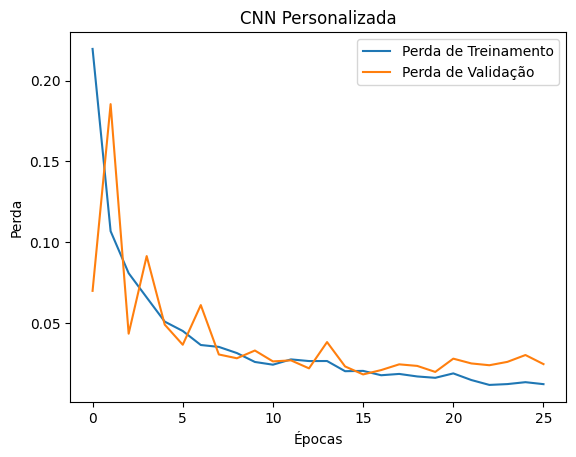

CNN Personalizada - Perda: 0.018282387405633926, Acurácia: 0.9941999912261963


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

def carregar_e_preparar_dados():
    (x_treino, y_treino), (x_teste, y_teste) = tf.keras.datasets.mnist.load_data()
    x_treino, x_teste = x_treino / 255.0, x_teste / 255.0
    y_treino = tf.keras.utils.to_categorical(y_treino, 10)
    y_teste = tf.keras.utils.to_categorical(y_teste, 10)
    x_treino = np.expand_dims(x_treino, axis=-1)
    x_teste = np.expand_dims(x_teste, axis=-1)
    return (x_treino, y_treino), (x_teste, y_teste)

(x_treino, y_treino), (x_teste, y_teste) = carregar_e_preparar_dados()

def plotar_historico(historico, titulo):
    plt.plot(historico.history['accuracy'], label='Acurácia de Treinamento')
    plt.plot(historico.history['val_accuracy'], label='Acurácia de Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.title(titulo)
    plt.legend()
    plt.show()

    plt.plot(historico.history['loss'], label='Perda de Treinamento')
    plt.plot(historico.history['val_loss'], label='Perda de Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.title(titulo)
    plt.legend()
    plt.show()

def treinar_cnn(x_treino, y_treino, x_teste, y_teste):
    modelo = Sequential()

    # Camada 1: Conv2D
    modelo.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
    modelo.add(BatchNormalization())
    modelo.add(MaxPooling2D((2, 2)))

    # Camada 2: Conv2D
    modelo.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    modelo.add(BatchNormalization())
    modelo.add(MaxPooling2D((2, 2)))

    # Camada 3: Conv2D
    modelo.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    modelo.add(BatchNormalization())

    # Camada 4: Conv2D
    modelo.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    modelo.add(BatchNormalization())

    # Camada 5: Conv2D
    modelo.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    modelo.add(BatchNormalization())

    # Camada 6: Conv2D
    modelo.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    modelo.add(BatchNormalization())

    modelo.add(Flatten())
    modelo.add(Dense(10, activation='softmax'))

    modelo.compile(optimizer=Adam(learning_rate=0.0005), loss=CategoricalCrossentropy(), metrics=['accuracy'])

    parada_precoce = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1
    )

    datagen.fit(x_treino)

    historico = modelo.fit(datagen.flow(x_treino, y_treino, batch_size=64),
                           epochs=100,
                           validation_data=(x_teste, y_teste),
                           callbacks=[parada_precoce],
                           verbose=0)

    perda_teste, acuracia_teste = modelo.evaluate(x_teste, y_teste, verbose=0)
    plotar_historico(historico, "CNN Personalizada")
    return modelo, perda_teste, acuracia_teste

modelo_cnn, perda_cnn, acuracia_cnn = treinar_cnn(x_treino, y_treino, x_teste, y_teste)
print(f'CNN Personalizada - Perda: {perda_cnn}, Acurácia: {acuracia_cnn}')